# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

# Data Loading

In [ ]:
# Loading the dataset
spambase = pd.read_csv("spambase.csv")

# Adding column names
spambase.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

In [ ]:
# Displaying the top 5 rows of dataset
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# Data Cleaning

In [ ]:
# Remove duplicate rows in the dataset
spambase = spambase.drop_duplicates()

In [ ]:
# Shape of the dataset after dropping the duplicate rows
spambase.shape

(4209, 58)

# Visualizing the dataset

The shape of the dataset

In [ ]:
spambase.shape

(4209, 58)

Summary of dataset

In [ ]:
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [ ]:
spambase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4209 non-null   float64
 1   word_freq_address           4209 non-null   float64
 2   word_freq_all               4209 non-null   float64
 3   word_freq_3d                4209 non-null   float64
 4   word_freq_our               4209 non-null   float64
 5   word_freq_over              4209 non-null   float64
 6   word_freq_remove            4209 non-null   float64
 7   word_freq_internet          4209 non-null   float64
 8   word_freq_order             4209 non-null   float64
 9   word_freq_mail              4209 non-null   float64
 10  word_freq_receive           4209 non-null   float64
 11  word_freq_will              4209 non-null   float64
 12  word_freq_people            4209 non-null   float64
 13  word_freq_report            4209 

Visualize the distribution of spam and non-spam emails

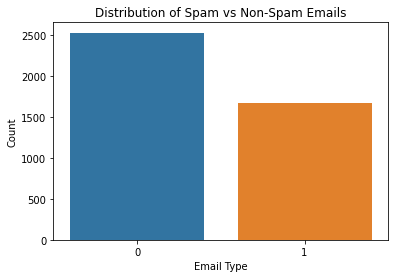

In [ ]:
sns.countplot(x='class', data=spambase)
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

Visualize the correlation between the features

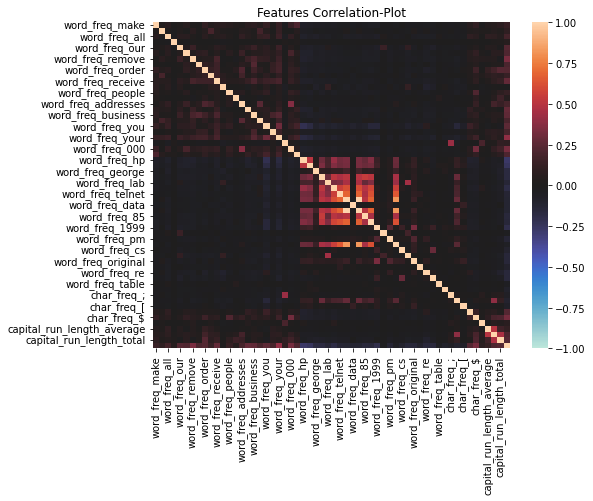

In [ ]:
# Compute the correlation matrix
corr = spambase.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sns.heatmap(corr, vmin=-1, vmax=1, center=0) 
plt.show()

# Extract the features and target variable

In [ ]:
# Create a dataframe with all data except the target column
X = spambase.drop(columns=['class'])

# Separate target values
Y = spambase['class'].values

# Standardizing the dataset

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Transform the features
X_scaled = scaler.fit_transform(X)

# Performing PCA

### Applying PCA on scaled data

Determining optimal number of components

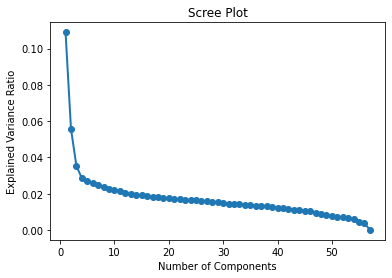

Optimal number of components: 49


In [ ]:
# Creating a PCA object and fit the scaled data
pca = PCA()
pca.fit(X_scaled)

# generate scree plot
plt.plot(np.arange(1, pca.n_components_+1), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# determine optimal number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print('Optimal number of components:', n_components)

In [ ]:
pca = PCA(n_components=49)
pca.fit(X_scaled)

# Transform the data
X_pca = pca.transform(X_scaled)

Get reconstruction loss

In [ ]:
# Reconstruct the data using the retained principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Compute the reconstruction loss
reconstruction_loss = np.mean(np.square(X_scaled - X_reconstructed))
print('Reconstruction loss:', reconstruction_loss)

Reconstruction loss: 0.043327609481529784


## Performing Decision Tree

Splitting the pca perfomed data into train and test data


In [ ]:
# Split the scaled data into training and testing sets
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca, Y, test_size=0.25, random_state=0)

Training the model

In [ ]:
# Train a Decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_pca_train, Y_pca_train)

DecisionTreeClassifier(random_state=42)

### Visualizing our final decision tree

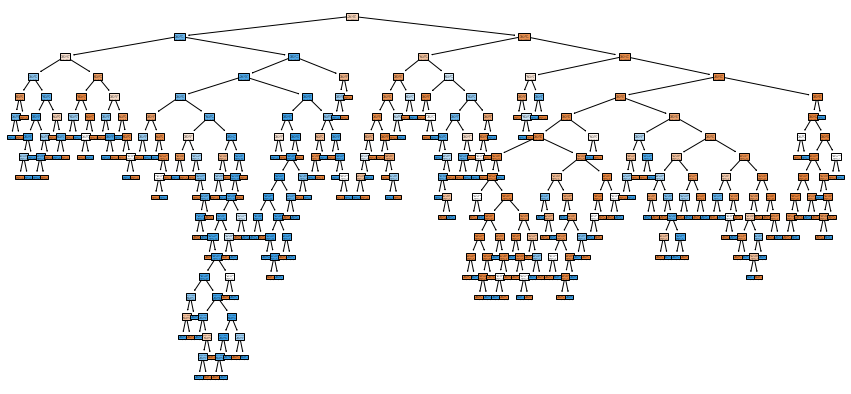

In [ ]:
plt.figure(figsize=(15,7))
tree.plot_tree(dt,filled=True)
plt.show()

Checking accuracy of test data

In [ ]:
# Predict the labels of the test set
Y_pca_test_pred = dt.predict(X_pca_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_pca_test, Y_pca_test_pred)
print("Test data accuracy: {:.2f}%".format(accuracy * 100))

Test data accuracy: 88.79%


In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_pca_test, Y_pca_test_pred)

print('Confusion Matrix')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

True Positives(TP) =  564

True Negatives(TN) =  371

False Positives(FP) =  52

False Negatives(FN) =  66


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_pca_test, Y_pca_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       616
           1       0.88      0.85      0.86       437

    accuracy                           0.89      1053
   macro avg       0.89      0.88      0.88      1053
weighted avg       0.89      0.89      0.89      1053



Checking accuracy of train data


In [ ]:
# Predict the labels of the test set
Y_pca_train_pred = dt.predict(X_pca_train)
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_pca_train, Y_pca_train_pred)
print("Train data accuracy: {:.2f}%".format(accuracy * 100))

Train data accuracy: 100.00%


In [ ]:
# Print the Confusion Matrix
cm = confusion_matrix(Y_pca_train, Y_pca_train_pred)

print('Confusion Matrix')
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

True Positives(TP) =  1915

True Negatives(TN) =  1241

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
# Print the Confusion Matrix Report
print(classification_report(Y_pca_train, Y_pca_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00      1241

    accuracy                           1.00      3156
   macro avg       1.00      1.00      1.00      3156
weighted avg       1.00      1.00      1.00      3156



# ROC curve and AUC

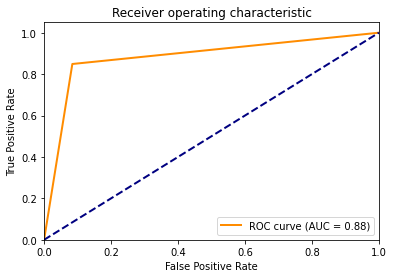

AUC: 0.88


In [ ]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Y_pca_test, Y_pca_test_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print("AUC: %0.2f" % roc_auc)

###### Here we can clearly see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted and to avoid this we will use Pruning method.

# Pruning of decision tree

Deciding on best ccp_alpha value

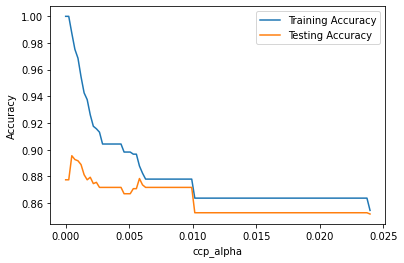

Best ccp_alpha: 0.00029925362624982406


In [ ]:
# Calculate the effective alphas using cost complexity pruning
path = dt.cost_complexity_pruning_path(X_pca_train, Y_pca_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a list of candidate ccp_alphas to evaluate
ccp_alphas = ccp_alphas[:-1]  # Remove the last alpha, which corresponds to the unpruned tree
candidate_alphas = np.linspace(ccp_alphas[0], ccp_alphas[-1], num=100)

# Train decision trees with increasing ccp_alpha values and evaluate their accuracy
train_accs = []
test_accs = []
for alpha in candidate_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    dt.fit(X_pca_train, Y_pca_train)
    train_acc = dt.score(X_pca_train, Y_pca_train)
    test_acc = dt.score(X_pca_test, Y_pca_test)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plot the training and validation accuracy for each ccp_alpha value
plt.plot(candidate_alphas, train_accs, label="Training Accuracy")
plt.plot(candidate_alphas, test_accs, label="Testing Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Find the ccp_alpha value that maximizes the validation accuracy
# best_alpha = candidate_alphas[np.argmax(val_accs)]
# print(f"\nBest ccp_alpha: {best_alpha:.3f}"
# Find the best ccp_alpha value that maximizes the testing accuracy
best_ccp_alpha = ccp_alphas[np.argmax(test_accs)]
print("Best ccp_alpha:", best_ccp_alpha)

Train a decision tree with pruning using the optimal ccp_alpha value

In [ ]:
dt_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.008)
dt_pruned.fit(X_pca_train, Y_pca_train)

DecisionTreeClassifier(ccp_alpha=0.008, random_state=0)

Accuracy of testing data

In [ ]:
# Evaluate the pruned decision tree on the testing set
test_acc = dt_pruned.score(X_pca_test, Y_pca_test)
print(f"Pruned Tree:\nTesting Accuracy: {test_acc:.3f}\n")

Pruned Tree:
Testing Accuracy: 0.872



Accuracy of training data

In [ ]:
# Evaluate the pruned decision tree on the training set
train_acc = dt_pruned.score(X_pca_train, Y_pca_train)
print(f"Pruned Tree:\nTraining Accuracy: {train_acc:.3f}\n")

Pruned Tree:
Training Accuracy: 0.878



# Visualizing after pruning

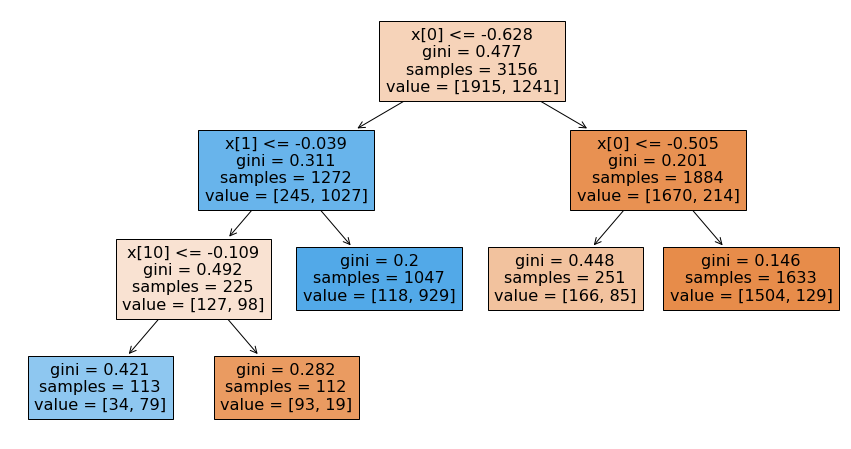

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(dt_pruned,filled=True)
plt.show()